In [2]:
# Import libraries and magics

import numpy as np
import pandas as pd
from scipy import stats
from pandas import DatetimeIndex as dt
from seaborn import pairplot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, classification_report

In [3]:
# Going through the data
data = pd.read_csv('starcraft_player_data.csv')
data

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,?,?,?,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,?,?,?,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,?,?,?,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,?,?,?,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [5]:
data.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

## We convert these 3 columns to numeric datatypes from object and find out that there are null values that are present. We use errors='coerce' since there are '?' values present in these 3 features. We convert it to null from '?'

In [6]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['HoursPerWeek'] = pd.to_numeric(data['HoursPerWeek'], errors='coerce')
data['TotalHours'] = pd.to_numeric(data['TotalHours'], errors='coerce')


In [7]:
data.isnull().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

## Conclusions we can form from this data:
1. We can see that for LeagueIndex we don't have many instances in the range 7-8.
2. The null values in those 3 features are about 1% of the entire dataset and we can use some inputing techniques for it.
3. We can come up with individual techniques to fill in the null values so that noise is not added to our dataset.

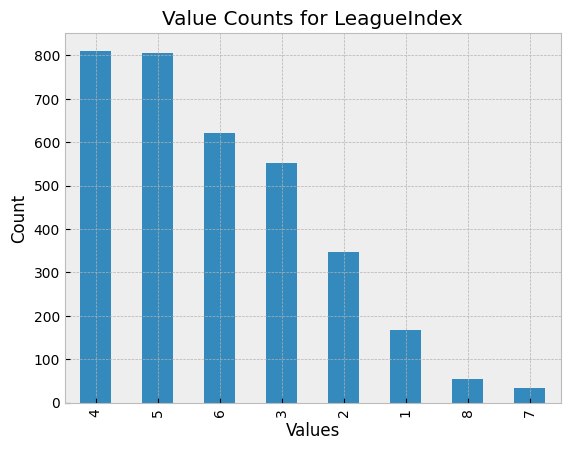

In [8]:

interesting_columns=[ 'LeagueIndex']
for column in interesting_columns:
    plt.figure()  # Create a new figure for each column
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Value Counts for {column}')
    plt.xlabel('Values')
    plt.ylabel('Count')
    plt.show()


## For age, we see that the LeagueIndex 8 has all missing values. Furthermore, we also see that as LeagueIndex increases the the distribution of the age decreases even though the mean remains relatvely same. We take the median of LeagueIndex 7 to impute the null values. 

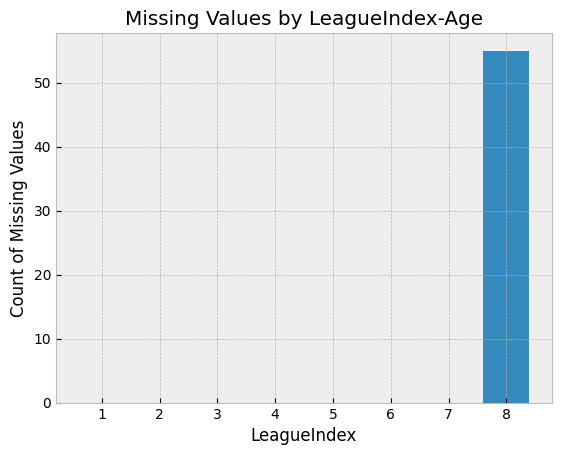

In [9]:
import matplotlib.pyplot as plt

# Create a range of LeagueIndex values from 1 to 8
league_index_range = range(1, 9)

# Initialize a list to store the count of missing values for each LeagueIndex category
missing_values_count = []

# Iterate over each LeagueIndex category
for index in league_index_range:
    count = data[(data["LeagueIndex"] == index) & (data["Age"].isnull())].shape[0]
    missing_values_count.append(count)

# Plot the bar chart
plt.bar(league_index_range, missing_values_count)
plt.xlabel("LeagueIndex")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values by LeagueIndex-Age")
plt.show()


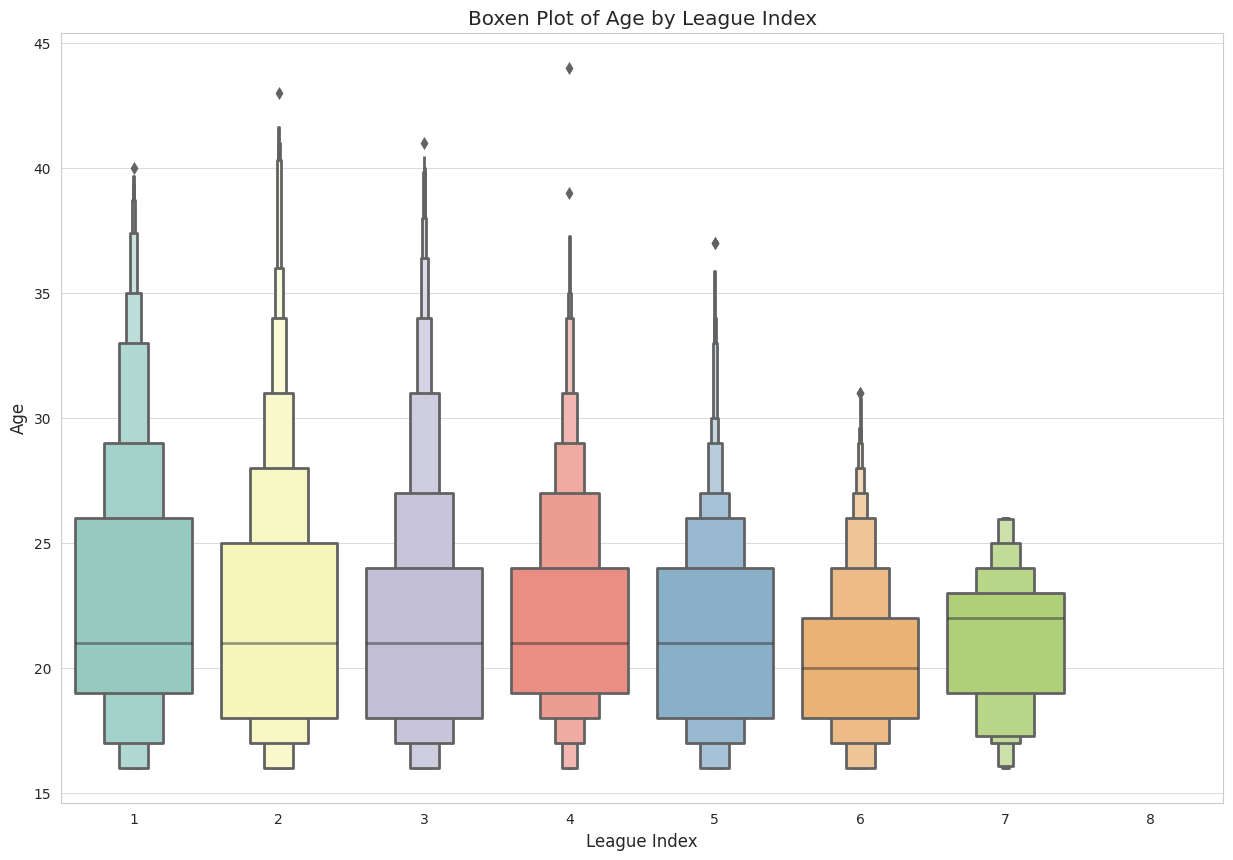

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")  # Set the style of the plot

sns.boxenplot(data=data, x="LeagueIndex", y="Age", palette="Set3", k_depth="proportion")
plt.xlabel("League Index")
plt.ylabel("Age")
plt.title("Boxen Plot of Age by League Index")

plt.show()


In [11]:
med_val = data[data["LeagueIndex"] == 7]["Age"].median()
data["Age"] = data["Age"].fillna(med_val)

## For HoursPerWeek we see that most null values are present in leageIndex 8 and one null value is present in LeagueIndex 5. The hours per week spent increases as the LeagueIndex increases which makes logical sense. Since there is quite a difference in the mean of all leagueIndex, we fill with individual median LeagueIndex values.

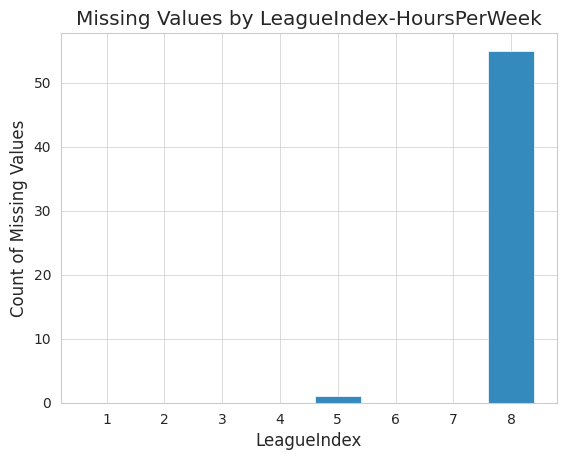

In [12]:
import matplotlib.pyplot as plt

# Create a range of LeagueIndex values from 1 to 8
league_index_range = range(1, 9)

# Initialize a list to store the count of missing values for each LeagueIndex category
missing_values_count = []

# Iterate over each LeagueIndex category
for index in league_index_range:
    count = data[(data["LeagueIndex"] == index) & (data["HoursPerWeek"].isnull())].shape[0]
    missing_values_count.append(count)

# Plot the bar chart
plt.bar(league_index_range, missing_values_count)
plt.xlabel("LeagueIndex")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values by LeagueIndex-HoursPerWeek")
plt.show()


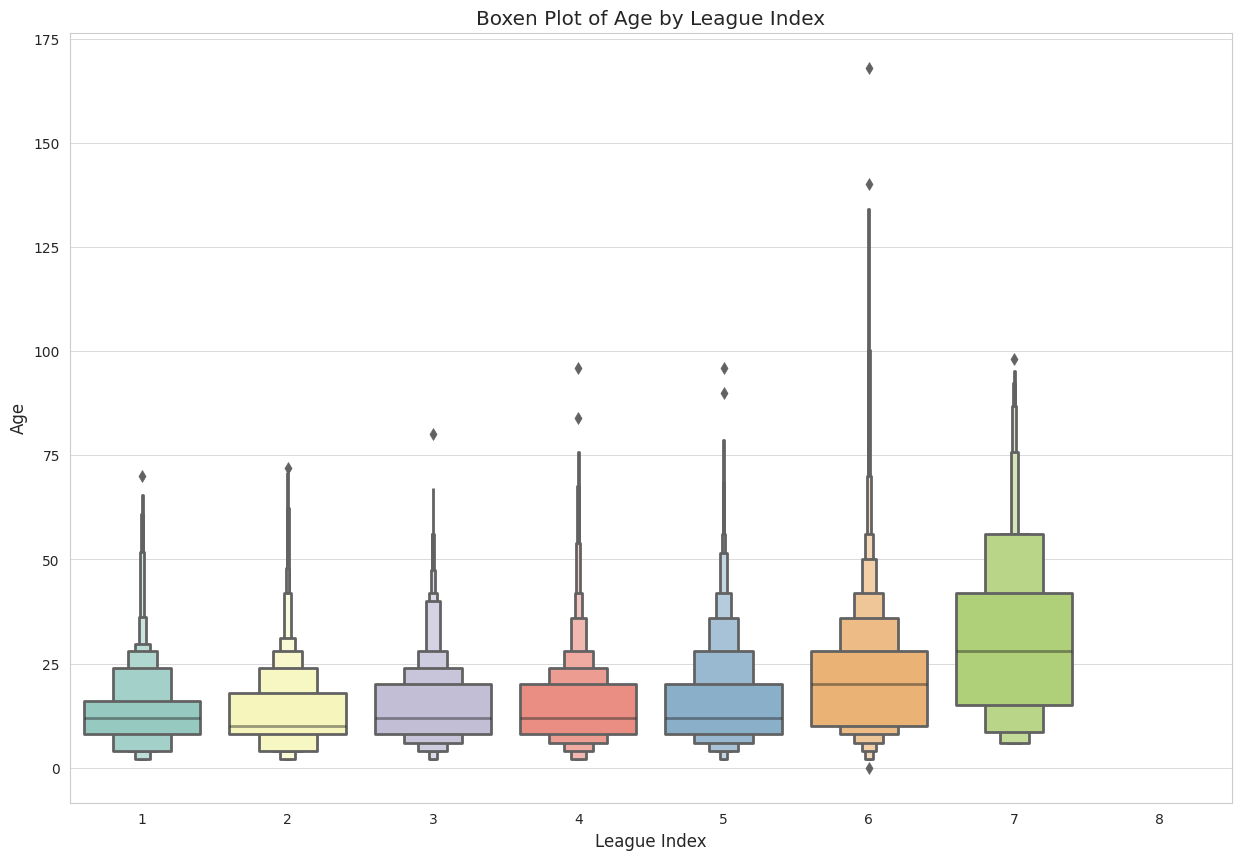

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")  # Set the style of the plot

sns.boxenplot(data=data, x="LeagueIndex", y="HoursPerWeek", palette="Set3", k_depth="proportion")
plt.xlabel("League Index")
plt.ylabel("Age")
plt.title("Boxen Plot of Age by League Index")

plt.show()


In [14]:
med_val_l5 = data[data["LeagueIndex"] == 5]["HoursPerWeek"].median()
data.loc[
    (data["HoursPerWeek"].isnull()) & (data["LeagueIndex"] == 5), "HoursPerWeek"
] = med_val_l5

# Now imputing the missing value for player with missing hoursperweek for leagueindex = 8
med_val_l8 = data[data["LeagueIndex"] == 7]["HoursPerWeek"].median()
data.loc[
    (data["HoursPerWeek"].isnull()) & (data["LeagueIndex"] == 8), "HoursPerWeek"
] = med_val_l8

## Logically the total hours increases as the LeagueIndex increases, since the more you play the better you are. Since the box plot is on the log normal scale, there is quite a big difference between the mean total hours per leagueindex. Yet again, most of the missing values are from LeagueIndex 8 and a few from index 5. We fill these with the median values from the individual Total Hours per leagueIndex.

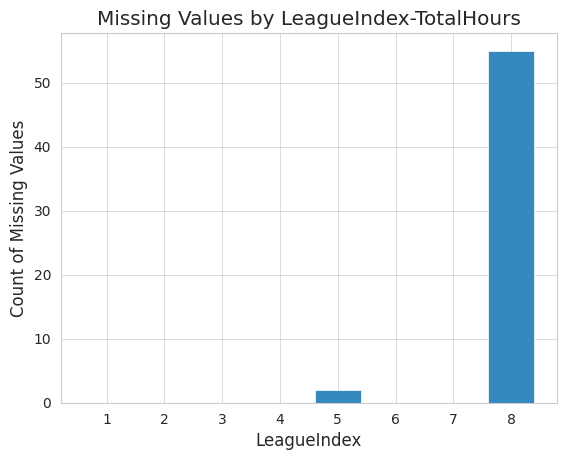

In [15]:
import matplotlib.pyplot as plt

# Create a range of LeagueIndex values from 1 to 8
league_index_range = range(1, 9)

# Initialize a list to store the count of missing values for each LeagueIndex category
missing_values_count = []

# Iterate over each LeagueIndex category
for index in league_index_range:
    count = data[(data["LeagueIndex"] == index) & (data["TotalHours"].isnull())].shape[0]
    missing_values_count.append(count)

# Plot the bar chart
plt.bar(league_index_range, missing_values_count)
plt.xlabel("LeagueIndex")
plt.ylabel("Count of Missing Values")
plt.title("Missing Values by LeagueIndex-TotalHours")
plt.show()


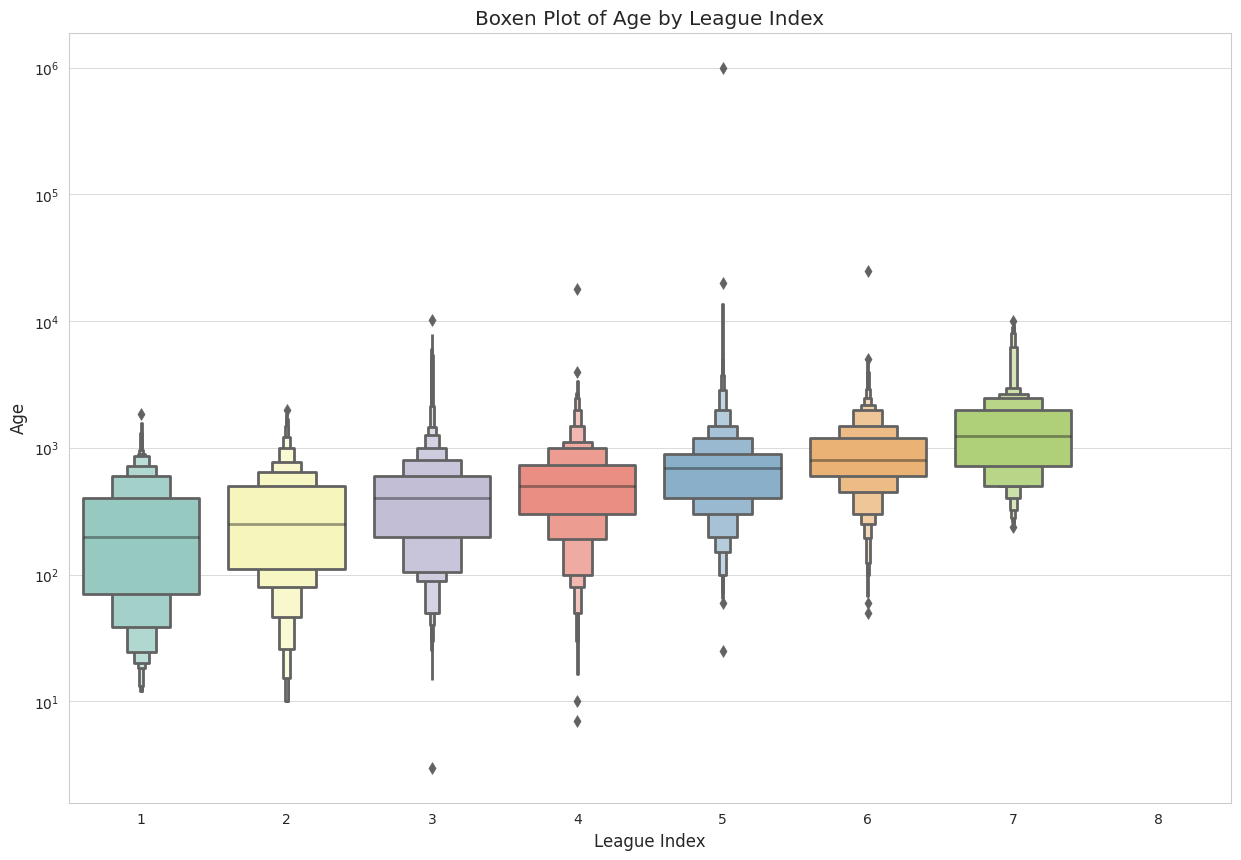

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")  # Set the style of the plot

sns.boxenplot(data=data, x="LeagueIndex", y="TotalHours", palette="Set3", k_depth="proportion")
plt.xlabel("League Index")
plt.ylabel("Age")
plt.title("Boxen Plot of Age by League Index")

plt.yscale("log")  # Change the scale of the y-axis to logarithmic


plt.show()


In [17]:
med_val_l5 = data[data["LeagueIndex"] == 5]["TotalHours"].median()
data.loc[
    (data["TotalHours"].isnull()) & (data["LeagueIndex"] == 5), "TotalHours"
] = med_val_l5

# Now imputing the missing value for player with missing hoursperweek for leagueindex = 8
med_val_l8 = data[data["LeagueIndex"] == 7]["TotalHours"].median()
data.loc[
    (data["TotalHours"].isnull()) & (data["LeagueIndex"] == 8), "TotalHours"
] = med_val_l8

In [18]:
data.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.653608,16.105449,964.959647,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.172356,11.961811,17172.134959,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [19]:
# Since it is not possible to play the entire week
data.loc[data["HoursPerWeek"] > 120, "HoursPerWeek"] = 120


In [20]:
data.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.653608,16.085420,964.959647,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.172356,11.752646,17172.134959,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,120.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


## We can see that there is high correlation between LeagueIndex and predictor variables, as is indicated by the heatmap where there are multiple values greater than 0.5 and lesser than -0.5. We see that multicollinearity is present in the data which would indicate that we can drop some features since some features would be redundant.

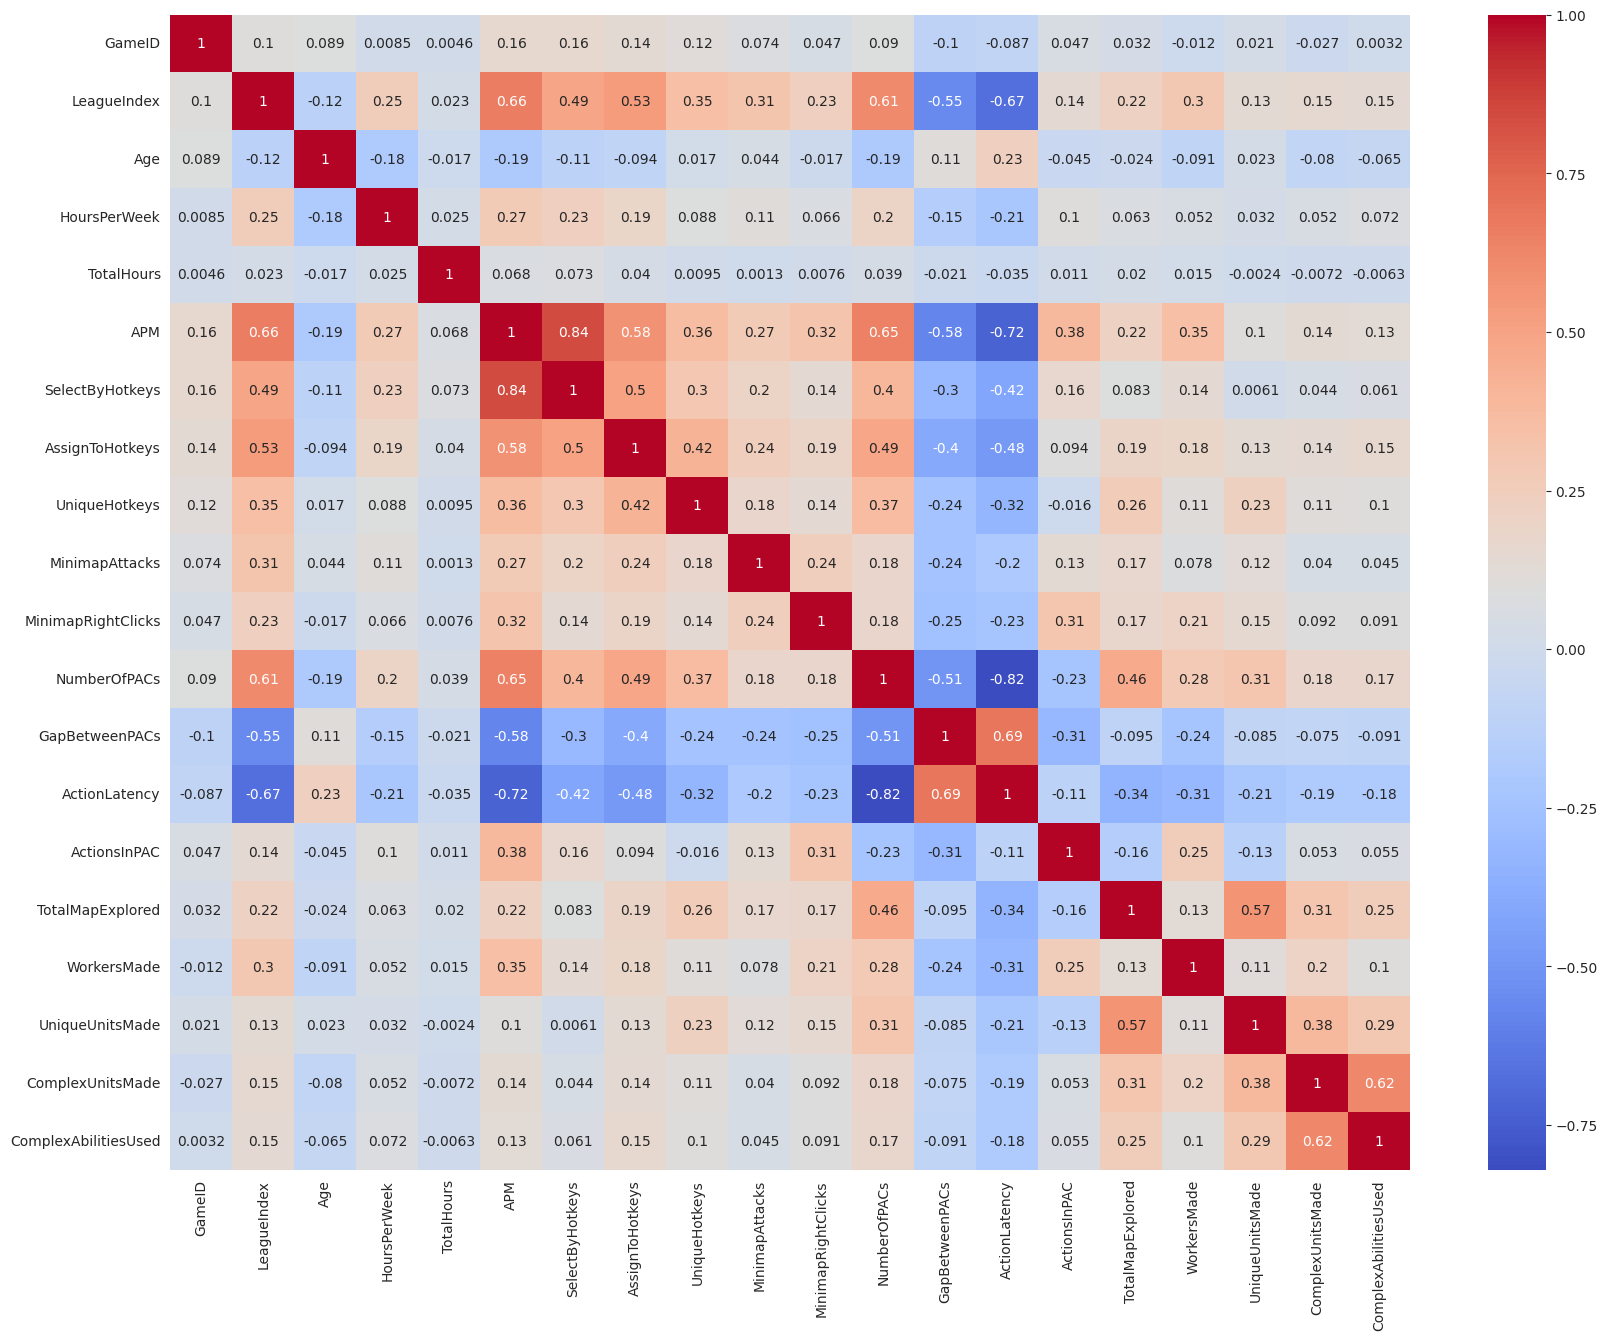

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

## We are removing the GameID and LeagueIndex features. GameID offers no valuable information intuitively and the correlation is also low with LeagueIndex. We can try to to use techniques like Variance inflation factor to measure multicollienarity in the features. 

Interpretation of VIF:

VIF=1 There is no multicollinearity; the predictor variable is not correlated with other predictors.

VIF > 1 and < 5: There is moderate multicollinearity, indicating a moderate correlation with other predictors.

VIF >= 5: There is a high degree of multicollinearity, indicating a strong correlation with other predictors.

In [22]:
data_re = data.drop(["LeagueIndex","GameID"], axis=1)


In [23]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_re.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(data_re.values, i)
    for i in range(len(data_re.columns))
]

In [24]:
vif_data.sort_values(["VIF"], ascending=False)


,feature,VIF
3,APM,232.141090
9,NumberOfPACs,87.009324
12,ActionsInPAC,68.410297
11,ActionLatency,40.244447
0,Age,29.483299
4,SelectByHotkeys,23.235798
15,UniqueUnitsMade,22.060698
13,TotalMapExplored,18.184561
10,GapBetweenPACs,14.802954
5,AssignToHotkeys,6.491549



Next we also remove some features where the correlation is low with the target variable and the VIF factor is high. In this case  "ActionsInPAC", "UniqueUnitsMade"

In [25]:
gamedf_indpt = data.drop(
    ["LeagueIndex", "ActionsInPAC", "UniqueUnitsMade"], axis=1
)
vif_data = pd.DataFrame()
vif_data["feature"] = gamedf_indpt.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(gamedf_indpt.values, i)
    for i in range(len(gamedf_indpt.columns))
]
vif_data.sort_values(["VIF"], ascending=False)

,feature,VIF
4,APM,51.618980
10,NumberOfPACs,34.791021
1,Age,28.122009
12,ActionLatency,26.916903
13,TotalMapExplored,14.854583
11,GapBetweenPACs,14.741981
5,SelectByHotkeys,8.119519
6,AssignToHotkeys,6.481163
14,WorkersMade,6.460107
7,UniqueHotkeys,5.857128


We also remove APM since it is highly correlated with ActionLatency which is further highly correlated with LeagueIndex

In [26]:
gamedf_indpt = data.drop(
    ["LeagueIndex", "ActionsInPAC", "UniqueUnitsMade","APM"], axis=1
)
vif_data = pd.DataFrame()
vif_data["feature"] = gamedf_indpt.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(gamedf_indpt.values, i)
    for i in range(len(gamedf_indpt.columns))
]
vif_data.sort_values(["VIF"], ascending=False)

,feature,VIF
1,Age,27.691425
11,ActionLatency,26.866244
9,NumberOfPACs,23.400289
12,TotalMapExplored,14.853234
10,GapBetweenPACs,13.937734
5,AssignToHotkeys,6.461673
6,UniqueHotkeys,5.856953
13,WorkersMade,5.568088
0,GameID,4.308569
2,HoursPerWeek,3.098915


In [27]:
tmp=data
data=data.drop(["ActionsInPAC", "UniqueUnitsMade","APM"], axis=1)

##  Steps before feeding the data into the model"
1. We split our dataset in train and test dividing it into a 80:20 split. We do a stratified split since we want to divide the classes in a proportionate manner between the train and test dataset.
2. Furthermore we use a pipeline to standardize our dataset. We fit it on the training set and just transform it on the testing dataset.
3. I use F1 macro score since the dataset is imbalanced, and it is a multi class classification along with the fact that all classes are of equal importance.





In [76]:
X = data.drop(columns=['LeagueIndex'])
y = data['LeagueIndex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

X_train.shape, y_train.shape,X_test.shape, y_test.shape

((2716, 16), (2716,), (679, 16), (679,))

In [77]:
num_2scale_attribs = list(X_train.columns)



# Pipeline for numerical attributes to be scaled
num_2scale_pipeline = Pipeline([('std_scaler', StandardScaler())]) 


train_set_prepared = num_2scale_pipeline.fit_transform(X_train)

In [78]:
train_set_prepared.shape

(2716, 16)

In [79]:
test_set_prepared = num_2scale_pipeline.transform(X_test)


In [80]:
df_train_set_prepared = pd.DataFrame(data=train_set_prepared, columns=num_2scale_attribs)

df_train_set_prepared

,GameID,Age,HoursPerWeek,TotalHours,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,TotalMapExplored,WorkersMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,1.318432,-0.156888,-0.010148,-0.033614,-0.647269,-0.786519,-1.859269,-0.601104,-0.685494,0.105141,-0.175572,-0.541348,-1.228037,0.228589,-0.534712,-0.533526
1,1.155848,-0.873436,1.010672,-0.002345,0.186175,0.592114,1.504724,-0.601104,-0.440049,0.830187,-0.922867,-0.389448,1.180543,0.940189,-0.272220,-0.533526
2,0.366676,-0.634587,1.010672,-0.012768,1.516507,2.064971,0.663726,0.005912,2.201970,1.339523,-1.595382,-1.465478,-0.558987,0.626469,-0.534712,2.018332
3,-1.013281,-1.351135,-0.860831,-0.019543,-0.710278,-0.478394,-1.438770,-0.566649,-0.930200,-1.611500,3.704689,2.495767,0.110063,-1.032991,-0.088638,0.190684
4,1.599758,1.276208,-0.690695,-0.017980,-0.082602,-0.143502,0.243227,-0.146569,1.028012,-0.351144,1.588008,0.087515,-1.361847,-0.146098,-0.534712,-0.533526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,0.227109,0.081962,-0.860831,-0.033614,-0.071696,0.896602,0.243227,3.547702,0.295307,0.092809,-0.988751,-0.425834,1.046733,-0.911631,-0.534712,-0.533526
2712,-0.788586,-0.156888,0.330125,-0.012768,-0.118653,0.248477,-0.597771,8.596995,-0.306486,1.165477,-0.770078,-0.825397,0.377683,3.038640,-0.231699,-0.533526
2713,-0.349060,-1.351135,-0.180285,-0.036220,-0.394137,0.374336,-0.597771,-0.545344,0.064697,-0.068947,0.588303,-0.521695,0.377683,0.175446,2.032074,0.939938
2714,1.402830,-1.351135,-0.690695,-0.028403,0.286839,0.485182,-0.597771,-0.421196,1.967961,-1.046775,-0.717350,0.367619,0.243873,0.035378,0.845552,2.275640


## Model Selection
1. We use random forest classfier,gradient boosting, logistic regression and neural networks and see that it overfits on the training data and that is evident by the testing accuracy that is slightly low(42%). 
2. Furthermore, we see that the model classifies the LeagueIndex 8 datapoints at a 100% accuracy as compared to the other LeagueIndex's. 
3. This is clearly erroneous since we have filled AGE, TOTAL_HOURS, HOURS_PER_WEEK with the median of LeagueIndex 7. This is easy for the model to identify.
4. I tried using for SMOTE for generating synthetic data since the classes were imbalanced but that does not increase the performance on the test dataset.
5. Cross validation was applied, and a 95% confidence interval was also calculated. However, on unseen data the accuracy did not increase more than 42%. 
6. Hyperparameter tuning was also done for developing a robust model.
7. In this specific case, we are trying to predict one out of eight possible ranks for each player. Since the ranks are closely related and can vary by only one position, we introduced an error range of plus or minus 1. This means that if our model predicts a rank that is one position higher or lower than the actual rank, we consider it an acceptable prediction.
By incorporating this error range, our accuracy significantly improves to 88%. This means that in nearly 9 out of 10 cases, our model predicts the rank either correctly or within one position of the true rank. This level of performance is quite promising, considering the closely related nature of the ranks. Even if the model predicts a rank that is off by one, it is still considered a valuable prediction since it is very close to the actual rank.
8. Dropping the features that have a high VIF value does not help increase the performance on the test dataset. 

In [64]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import scipy.stats as stats


from keras.layers import Dropout
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam

# Apply SMOTE to handle class imbalance
smote = SMOTE()
#df_train_set_prepared, y_train = smote.fit_resample(df_train_set_prepared, y_train)
# Create the Random Forest classifier
rf = RandomForestClassifier(bootstrap=True, oob_score=True, max_samples=0.8, random_state=3)

# Define the parameter grid for tuning
param_grid = {'n_estimators': [100],
              'max_depth': [None, 5, 10, 15],
              'min_samples_split': [10],
              'min_samples_leaf': [4],
              'max_features': ['sqrt', 'log2']}

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Stratified K-fold for multi-class
grid_search = GridSearchCV(rf, param_grid, scoring='f1_macro', n_jobs=-1, cv=cv, refit=True)
grid_search.fit(df_train_set_prepared, y_train)

# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the training set
y_train_model_rf = best_estimator.predict(df_train_set_prepared)

# Perform cross-validation on the best estimator
scores_model_rf = cross_val_score(best_estimator, df_train_set_prepared, y_train, cv=cv, scoring='f1_macro')

# Print the cross-validation scores
print('Cross-Validation Scores:')
print(scores_model_rf)
confidence = 0.95
print('Training F1 Score:', np.mean(scores_model_rf))
print('95% CI:', stats.t.interval(confidence, len(scores_model_rf) - 1,
                                  loc=np.mean(scores_model_rf),
                                  scale=np.std(scores_model_rf, ddof=1) / np.sqrt(len(scores_model_rf))))


# Evaluate performance on the test set
y_test_model_rf = best_estimator.predict(test_set_prepared)
print('Test Set Evaluation:')
print(classification_report(y_test, y_test_model_rf))


Cross-Validation Scores:
[0.42197991 0.4265486  0.41008572 0.44823598 0.39075007 0.4320571
 0.4404112  0.41490338 0.44287559 0.42667718]
Training F1 Score: 0.4254524710587309
95% CI: (0.4131623994947289, 0.43774254262273293)
Test Set Evaluation:
              precision    recall  f1-score   support

           1       0.57      0.39      0.46        33
           2       0.34      0.30      0.32        70
           3       0.37      0.24      0.29       111
           4       0.36      0.46      0.40       162
           5       0.37      0.44      0.40       161
           6       0.56      0.50      0.53       124
           7       0.00      0.00      0.00         7
           8       1.00      1.00      1.00        11

    accuracy                           0.41       679
   macro avg       0.45      0.42      0.43       679
weighted avg       0.42      0.41      0.41       679



In [ ]:
best_params

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 95}

In [56]:
y_test_model_rf = best_estimator.predict(df_train_set_prepared)
print('Train Set Evaluation:')
print(classification_report(y_train, y_test_model_rf))
# This is actually the train set result, did not run it again since I didn't save my model, we can clearly see that the model is overfitting 
# on the training data.

Train Set Evaluation:
              precision    recall  f1-score   support

           1       0.93      0.99      0.96       649
           2       0.94      0.97      0.95       649
           3       0.94      0.91      0.92       649
           4       0.94      0.86      0.89       649
           5       0.93      0.87      0.90       649
           6       0.87      0.94      0.90       649
           7       0.98      1.00      0.99       649
           8       1.00      1.00      1.00       649

    accuracy                           0.94      5192
   macro avg       0.94      0.94      0.94      5192
weighted avg       0.94      0.94      0.94      5192



Test Set Evaluation:


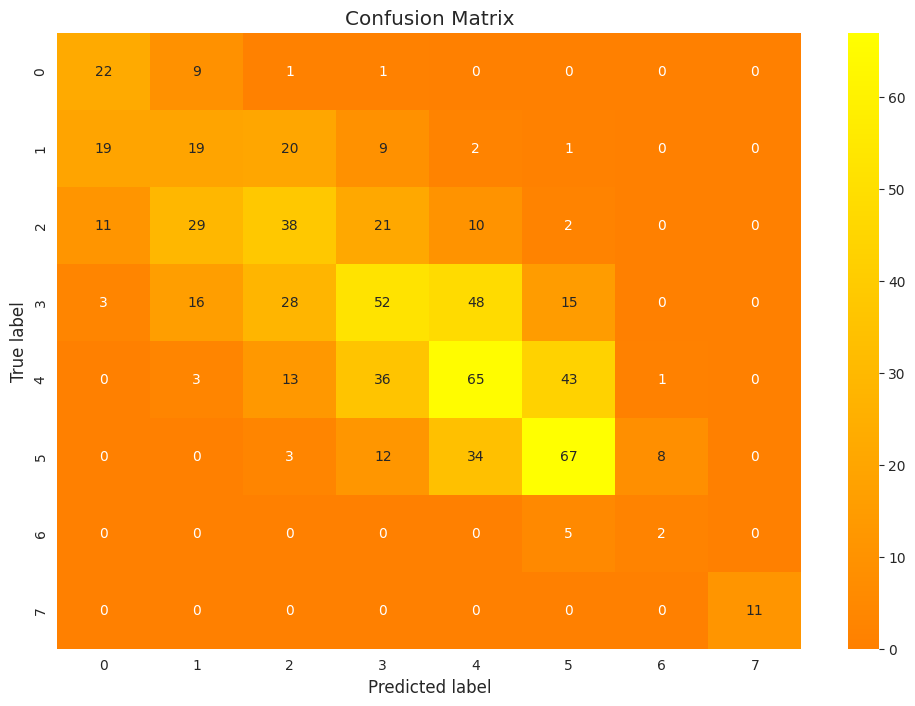

In [57]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
y_test_model_rf = best_estimator.predict(test_set_prepared)
print('Test Set Evaluation:')
cm_rf = confusion_matrix(y_test, y_test_model_rf)
draw_confusion_matrix(cm_rf)

In [65]:
def calculate_accuracy(true_labels, predicted_labels):
    total_predictions = len(true_labels)
    correct_predictions = 0

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if abs(predicted_label - true_label) <= 1:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy
calculate_accuracy(y_test, y_test_model_rf)

87.77614138438881

In [ ]:
 # Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np
import scipy.stats as stats

# Create the Gradient Boosting classifier
gb = GradientBoostingClassifier(random_state=3)

# Define the parameter grid for tuning
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7]}

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Stratified K-fold for multi-class
grid_search = GridSearchCV(gb, param_grid, scoring='f1_macro', n_jobs=-1, cv=cv, refit=True)
grid_search.fit(df_train_set_prepared, y_train)

# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the training set
y_train_model_gb = best_estimator.predict(df_train_set_prepared)

# Perform cross-validation on the best estimator
scores_model_gb = cross_val_score(best_estimator, df_train_set_prepared, y_train, cv=cv, scoring='f1_macro')

# Print the cross-validation scores
print('Cross-Validation Scores:')
print(scores_model_gb)
confidence = 0.95
print('Training F1 Score:', np.mean(scores_model_gb))
print('95% CI:', stats.t.interval(confidence, len(scores_model_gb) - 1,
                                  loc=np.mean(scores_model_gb),
                                  scale=np.std(scores_model_gb, ddof=1) / np.sqrt(len(scores_model_gb))))


# Evaluate performance on the test set
y_test_model_gb = best_estimator.predict(test_set_prepared)
print('Test Set Evaluation:')
print(classification_report(y_test, y_test_model_gb))


Cross-Validation Scores:
[0.46310942 0.40819944 0.38094769 0.42026116 0.40590591 0.39066955
 0.47724717 0.38618565 0.45498668 0.41665838]
Training F1 Score: 0.4204171040090823
95% CI: (0.3962922725246684, 0.44454193549349613)
Test Set Evaluation:
              precision    recall  f1-score   support

           1       0.58      0.45      0.51        33
           2       0.34      0.31      0.33        70
           3       0.37      0.23      0.28       111
           4       0.37      0.45      0.41       162
           5       0.37      0.44      0.40       161
           6       0.55      0.53      0.54       124
           7       1.00      0.14      0.25         7
           8       1.00      1.00      1.00        11

    accuracy                           0.42       679
   macro avg       0.57      0.45      0.46       679
weighted avg       0.43      0.42      0.41       679



In [66]:
#Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', random_state=0)

param_grid = {'penalty': ['l1','l2', 'none', 'elasticnet'],
             'C': np.linspace(0.5, 1.5, 100)}

grid_search = GridSearchCV(log_reg, param_grid,
                          scoring='accuracy',
                          n_jobs=-1,
                          cv=10,
                          refit=True)
grid_search.fit(train_set_prepared, y_train)

grid_search.best_params_

{'C': 0.5202020202020202, 'penalty': 'l1'}

In [67]:
log_reg_final = grid_search.best_estimator_

y_train_model6_logreg = log_reg_final.predict(train_set_prepared)

In [68]:
scores_model6_logreg = cross_val_score(log_reg_final, 
                                train_set_prepared, y_train,
                                n_jobs=-1,
                                cv=10, 
                                scoring='accuracy')

print(scores_model6_logreg)
confidence = 0.95
print('Training accuracy: ', accuracy_score(y_train, y_train_model6_logreg))
print('95% CI: ', stats.t.interval(confidence, len(scores_model6_logreg) - 1,
                 loc=scores_model6_logreg.mean(),
                 scale=scores_model6_logreg.std(ddof=1)/np.sqrt(len(scores_model6_logreg))))

[0.40073529 0.43014706 0.40808824 0.40441176 0.42279412 0.41544118
 0.42066421 0.4501845  0.39114391 0.4095941 ]
Training accuracy:  0.43041237113402064
95% CI:  (0.4033476521249959, 0.4272932204602006)


Test Set Evaluation:


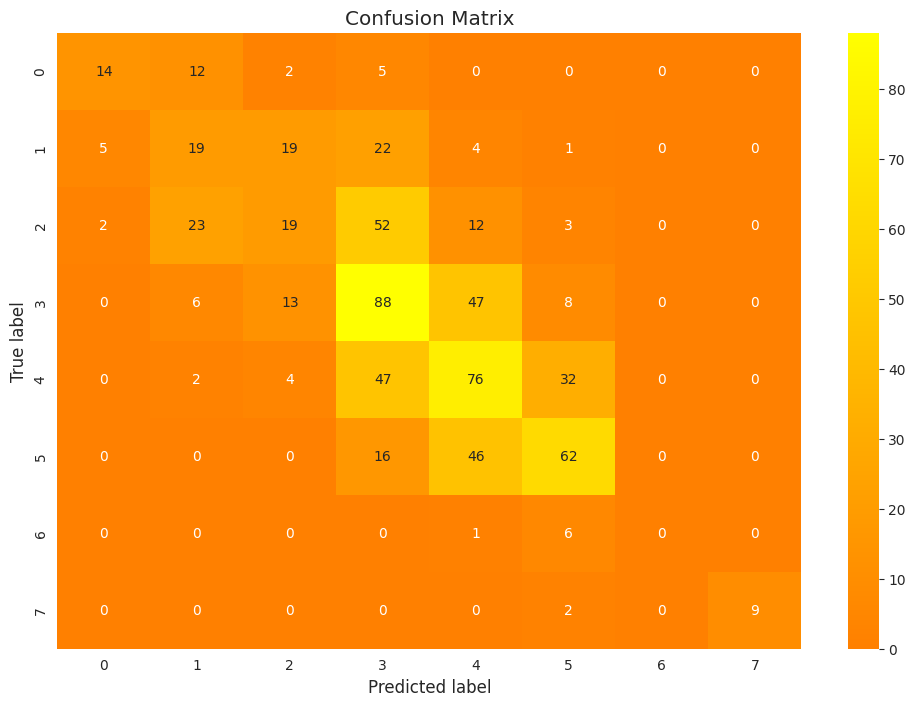

In [70]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

y_test_model_rf = log_reg_final.predict(test_set_prepared)
print('Test Set Evaluation:')
cm_rf = confusion_matrix(y_test, y_test_model_rf)
draw_confusion_matrix(cm_rf)

In [71]:
def calculate_accuracy(true_labels, predicted_labels):
    total_predictions = len(true_labels)
    correct_predictions = 0

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if abs(predicted_label - true_label) <= 1:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy
calculate_accuracy(y_test, y_test_model_rf)

86.74521354933727

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score

# Define a function to create the neural network model
def create_model(learn_rate=0.01):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(16,)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    optimizer = Adam(lr=learn_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Modify param_grid
param_grid = {'batch_size': [16,32],
              'epochs': [200],
              'learn_rate': [0.001, 0.01, 0.1]}
# Create the KerasClassifier wrapper
model = KerasClassifier(build_fn=create_model)

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified K-fold for multi-class
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_macro', cv=cv, refit=True)
grid_search.fit(df_train_set_prepared, y_train)

# Get the best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions on the training set
y_train_model_nn = best_estimator.predict(df_train_set_prepared)

# Convert the predicted labels to match the shape of y_train (if necessary)

# Perform cross-validation on the best estimator
scores_model_nn = cross_val_score(best_estimator, df_train_set_prepared, y_train, cv=cv, scoring='f1_macro')

# Print the cross-validation scores
print('Cross-Validation Scores:')
print(scores_model_nn)
confidence = 0.95
print('Training F1 Score:', np.mean(scores_model_nn))
print('95% CI:', stats.t.interval(confidence, len(scores_model_nn) - 1,
                                  loc=np.mean(scores_model_nn),
                                  scale=np.std(scores_model_nn, ddof=1) / np.sqrt(len(scores_model_nn))))

# Evaluate performance on the test set
y_test_model_nn = best_estimator.predict(test_set_prepared)
# Convert the predicted labels to match the shape of y_test (if necessary)

print('Test Set Evaluation:')
print(classification_report(y_test, y_test_model_nn))


Streaming output truncated to the last 5000 lines.
Epoch 118/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7708 - accuracy: 0.6861
Epoch 119/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.7124
Epoch 120/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7560 - accuracy: 0.7073
Epoch 121/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7428 - accuracy: 0.6931
Epoch 122/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7232 - accuracy: 0.7082
Epoch 123/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7768 - accuracy: 0.6898
Epoch 124/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.6815
Epoch 125/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7383 - accuracy: 0.7055
Epoch 126/200
68/68 [==============================] - 0s 2ms/step - loss: 0.7386 - accuracy: 0.7073
Epoch 127/200
68/68 [===================

The neural network using synthetic data has the best 95% confidence interval metrics when compared to other models on the training data, but the accuracy on testing data is not better.

22/22 [==============================] - 0s 942us/step
Test Set Evaluation:


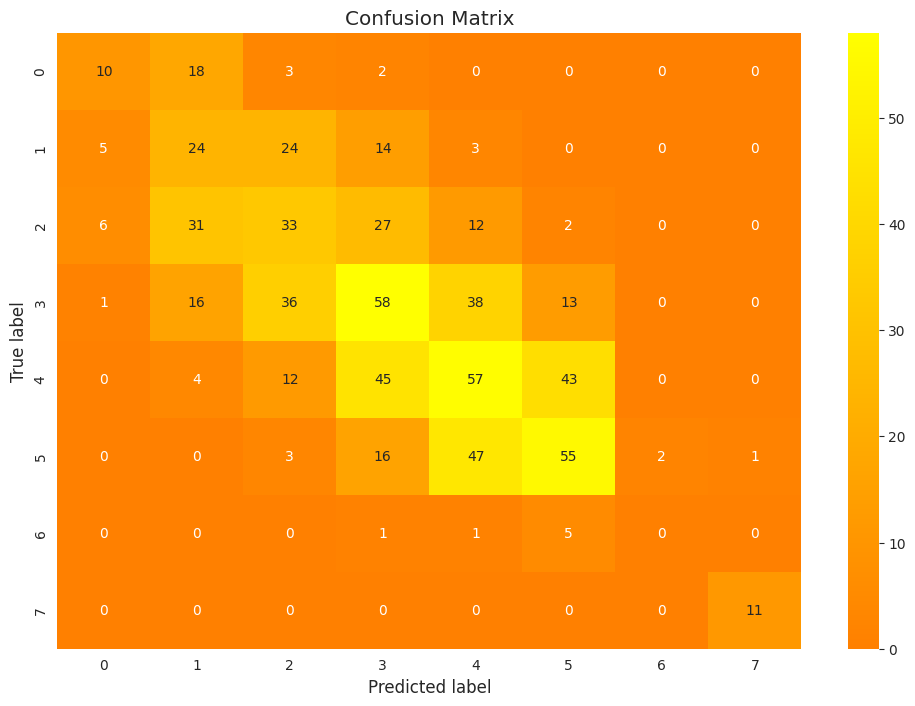

In [82]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

y_test_model_rf = best_estimator.predict(test_set_prepared)
print('Test Set Evaluation:')
cm_rf = confusion_matrix(y_test, y_test_model_rf)
draw_confusion_matrix(cm_rf)

In [83]:
def calculate_accuracy(true_labels, predicted_labels):
    total_predictions = len(true_labels)
    correct_predictions = 0

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        if abs(predicted_label - true_label) <= 1:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy
calculate_accuracy(y_test, y_test_model_rf)

83.79970544918999